In [232]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from scipy.io import loadmat

In [77]:
def posterior_samples_np(post, two_rate):
    if two_rate:
        Af_est = post.posterior.Af.mean(dim=["draw","chain"])
        As_est = post.posterior.As.mean(dim=["draw","chain"])
        Bf_est = post.posterior.Bf.mean(dim=["draw","chain"])
        Bs_est = post.posterior.Bs.mean(dim=["draw","chain"])
        sigma_etaf_est = post.posterior.sigma_etaf.mean(dim=["draw","chain"])
        sigma_etas_est = post.posterior.sigma_etas.mean(dim=["draw","chain"])
        sigma_epsilon_est = post.posterior.sigma_epsilon.mean(dim=["draw","chain"])
        est_params = {'Af_est': Af_est, 'Bf_est': Bf_est, 'sigma_etaf_est': sigma_etaf_est, 
                      'As_est': As_est, 'Bs_est': Bs_est, 'sigma_etas_est': sigma_etas_est, 
                      'sigma_epsilon_est': sigma_epsilon_est}
    else:            
        A_est = post.posterior.A.mean(dim=["draw","chain"])
        B_est = post.posterior.B.mean(dim=["draw","chain"])
        sigma_eta_est = post.posterior.sigma_eta.mean(dim=["draw","chain"])
        sigma_epsilon_est = post.posterior.sigma_epsilon.mean(dim=["draw","chain"])
        est_params = {'A_est': A_est, 'B_est': B_est, 'sigma_eta_est': sigma_eta_est, 'sigma_epsilon_est': sigma_epsilon_est}
   
    return est_params
    

In [257]:
def correlate_params(gen_params, est_params, two_rate):    
    if two_rate:
        fig, axs = plt.subplots(4, 4, figsize=(15, 14))
        axs[0,0].set_title("A_fast")
        counts, bins = np.histogram(est_params['Af_est'])
        axs[0,0].stairs(counts, bins,hatch='//')
        counts, bins = np.histogram(gen_params['Af_gen'])
        axs[0,0].stairs(counts, bins,color='black')
        axs[0,0].set_ylabel('Learners')

        axs[0,1].set_title("A_slow")
        counts, bins = np.histogram(est_params['As_est'])
        axs[0,1].stairs(counts, bins,hatch='//')
        counts, bins = np.histogram(gen_params['As_gen'])
        axs[0,1].stairs(counts, bins,color='black')
        axs[0,1].set_ylabel('Learners')

        axs[0,2].set_title("B_fast")
        counts, bins = np.histogram(est_params['Bf_est'])
        axs[0,2].stairs(counts, bins,hatch='//',color='red')
        counts, bins = np.histogram(gen_params['Bf_gen'])
        axs[0,2].stairs(counts, bins,color='black')
        axs[0,2].sharey(axs[0, 0])

        axs[0,3].set_title("B_slow")
        counts, bins = np.histogram(est_params['Bs_est'])
        axs[0,3].stairs(counts, bins,hatch='//',color='red')
        counts, bins = np.histogram(gen_params['Bs_gen'])
        axs[0,3].stairs(counts, bins,color='black')
        axs[0,3].sharey(axs[0, 0])

        axs[2,0].set_title("sigma_eta_fast")
        counts, bins = np.histogram(est_params['sigma_etaf_est'])
        axs[2,0].stairs(counts, bins,hatch='//',color='green')
        counts, bins = np.histogram(gen_params['sigma_etaf_gen'])
        axs[2,0].stairs(counts, bins,color='black')
        axs[2,0].sharey(axs[0, 0])

        axs[2,1].set_title("sigma_eta_slow")
        counts, bins = np.histogram(est_params['sigma_etas_est'])
        axs[2,1].stairs(counts, bins,hatch='//',color='green')
        counts, bins = np.histogram(gen_params['sigma_etas_gen'])
        axs[2,1].stairs(counts, bins,color='black')
        axs[2,1].sharey(axs[0, 0])

        axs[2,2].set_title("sigma_epsilon")
        counts, bins = np.histogram(est_params['sigma_epsilon_est'])
        axs[2,2].stairs(counts, bins,hatch='//',color='orange')
        counts, bins = np.histogram(gen_params['sigma_epsilon_gen'])
        axs[2,2].stairs(counts, bins,color='black')
        axs[2,2].sharey(axs[0, 0])

        axs[1,0].scatter(gen_params['Af_gen'],est_params['Af_est'])
        regr = LinearRegression().fit(gen_params['Af_gen'].reshape(-1,1),est_params['Af_est'])
        Af_pred = regr.predict(gen_params['Af_gen'].reshape(-1,1))
        axs[1,0].plot(gen_params['Af_gen'], Af_pred)
        axs[1,0].set_xlabel('Simulated')
        axs[1,0].set_ylabel('Estimated')
        axs[1,0].axis('square')
        axs[1,0].plot([0,1],[0,1],transform=axs[1,0].transAxes,color='black',linestyle='dashed')
        
        axs[1,1].scatter(gen_params['As_gen'],est_params['As_est'])
        regr = LinearRegression().fit(gen_params['As_gen'].reshape(-1,1),est_params['As_est'])
        As_pred = regr.predict(gen_params['As_gen'].reshape(-1,1))
        axs[1,1].plot(gen_params['As_gen'], As_pred)
        axs[1,1].set_xlabel('Simulated')
        axs[1,1].set_ylabel('Estimated')
        axs[1,1].axis('square')
        axs[1,1].plot([0,1],[0,1],transform=axs[1,1].transAxes,color='black',linestyle='dashed')

        axs[1,2].scatter(gen_params['Bf_gen'],est_params['Bf_est'],color='red')
        regr = LinearRegression().fit(gen_params['Bf_gen'].reshape(-1,1),est_params['Bf_est'])
        Bf_pred = regr.predict(gen_params['Bf_gen'].reshape(-1,1))
        axs[1,2].plot(gen_params['Bf_gen'], Bf_pred,color='red')
        axs[1,2].set_xlabel('Simulated')
        axs[1,2].axis('square')
        axs[1,2].plot([0,1],[0,1],transform=axs[1,2].transAxes,color='black',linestyle='dashed')
        
        axs[1,3].scatter(gen_params['Bs_gen'],est_params['Bs_est'],color='red')
        regr = LinearRegression().fit(gen_params['Bs_gen'].reshape(-1,1),est_params['Bs_est'])
        Bs_pred = regr.predict(gen_params['Bs_gen'].reshape(-1,1))
        axs[1,3].plot(gen_params['Bs_gen'], Bs_pred,color='red')
        axs[1,3].set_xlabel('Simulated')
        axs[1,3].axis('square')
        axs[1,3].plot([0,1],[0,1],transform=axs[1,3].transAxes,color='black',linestyle='dashed')
        
        axs[3,0].scatter(gen_params['sigma_etaf_gen'],est_params['sigma_etaf_est'],color='green')
        regr = LinearRegression().fit(gen_params['sigma_etaf_gen'].reshape(-1,1),est_params['sigma_etaf_est'])
        sigma_etaf_pred = regr.predict(gen_params['sigma_etaf_gen'].reshape(-1,1))
        axs[3,0].plot(gen_params['sigma_etaf_gen'], sigma_etaf_pred,color='green')
        axs[3,0].set_xlabel('Simulated')
        axs[3,0].axis('square')
        axs[3,0].plot([0,1],[0,1],transform=axs[3,0].transAxes,color='black',linestyle='dashed')
        
        axs[3,1].scatter(gen_params['sigma_etas_gen'],est_params['sigma_etas_est'],color='green')
        regr = LinearRegression().fit(gen_params['sigma_etas_gen'].reshape(-1,1),est_params['sigma_etas_est'])
        sigma_etas_pred = regr.predict(gen_params['sigma_etas_gen'].reshape(-1,1))
        axs[3,1].plot(gen_params['sigma_etas_gen'], sigma_etas_pred,color='green')
        axs[3,1].set_xlabel('Simulated')
        axs[3,1].axis('square')
        axs[3,1].plot([0,1],[0,1],transform=axs[3,1].transAxes,color='black',linestyle='dashed')

        axs[3,2].scatter(gen_params['sigma_epsilon_gen'],est_params['sigma_epsilon_est'],color='orange')
        regr = LinearRegression().fit(gen_params['sigma_epsilon_gen'].reshape(-1,1),est_params['sigma_epsilon_est'])
        sigma_eta_pred = regr.predict(gen_params['sigma_epsilon_gen'].reshape(-1,1))
        axs[3,2].plot(gen_params['sigma_epsilon_gen'], sigma_eta_pred,color='orange')
        axs[3,2].set_xlabel('Simulated')
        axs[3,2].axis('square')
        axs[3,2].plot([0,1],[0,1],transform=axs[3,2].transAxes,color='black',linestyle='dashed')

        fig.tight_layout()
    else:
        fig, axs = plt.subplots(2, 4, figsize=(15, 7))
        axs[0,0].set_title("A")
        counts, bins = np.histogram(est_params['A_est'])
        axs[0,0].stairs(counts, bins,hatch='//')
        counts, bins = np.histogram(gen_params['A_gen'])
        axs[0,0].stairs(counts, bins,color='black')
        axs[0,0].set_ylabel('Learners')

        axs[0,1].set_title("B")
        counts, bins = np.histogram(est_params['B_est'])
        axs[0,1].stairs(counts, bins,hatch='//',color='red')
        counts, bins = np.histogram(gen_params['B_gen'])
        axs[0,1].stairs(counts, bins,color='black')
        axs[0,1].sharey(axs[0, 0])

        axs[0,2].set_title("sigma_eta")
        counts, bins = np.histogram(est_params['sigma_eta_est'])
        axs[0,2].stairs(counts, bins,hatch='//',color='green')
        counts, bins = np.histogram(gen_params['sigma_eta_gen'])
        axs[0,2].stairs(counts, bins,color='black')
        axs[0,2].sharey(axs[0, 0])

        axs[0,3].set_title("sigma_epsilon")
        counts, bins = np.histogram(est_params['sigma_epsilon_est'])
        axs[0,3].stairs(counts, bins,hatch='//',color='orange')
        counts, bins = np.histogram(gen_params['sigma_epsilon_gen'])
        axs[0,3].stairs(counts, bins,color='black')
        axs[0,3].sharey(axs[0, 0])

        axs[1,0].scatter(gen_params['A_gen'],est_params['A_est'])
        regr = LinearRegression().fit(gen_params['A_gen'].reshape(-1,1),est_params['A_est'])
        A_pred = regr.predict(gen_params['A_gen'].reshape(-1,1))
        axs[1,0].plot(gen_params['A_gen'], A_pred)
        axs[1,0].set_xlabel('Simulated')
        axs[1,0].set_ylabel('Estimated')
        axs[1,0].set_xlim(0.95, 1)
        axs[1,0].set_ylim(0.95, 1)
        axs[1,0].plot([0,1],[0,1],transform=axs[1,0].transAxes,color='black',linestyle='dashed')

        axs[1,1].scatter(gen_params['B_gen'],est_params['B_est'],color='red')
        regr = LinearRegression().fit(gen_params['B_gen'].reshape(-1,1),est_params['B_est'])
        B_pred = regr.predict(gen_params['B_gen'].reshape(-1,1))
        axs[1,1].plot(gen_params['B_gen'], B_pred,color='red')
        axs[1,1].set_xlabel('Simulated')
        axs[1,1].set_xlim(0.05, 0.2)
        axs[1,1].set_ylim(0.05, 0.2)
        axs[1,1].plot([0,1],[0,1],transform=axs[1,1].transAxes,color='black',linestyle='dashed')
        
        axs[1,2].scatter(gen_params['sigma_eta_gen'],est_params['sigma_eta_est'],color='green')
        regr = LinearRegression().fit(gen_params['sigma_eta_gen'].reshape(-1,1),est_params['sigma_eta_est'])
        sigma_eta_pred = regr.predict(gen_params['sigma_eta_gen'].reshape(-1,1))
        axs[1,2].plot(gen_params['sigma_eta_gen'], sigma_eta_pred,color='green')
        axs[1,2].set_xlabel('Simulated')
        axs[1,2].set_xlim(0.1, 1.1)
        axs[1,2].set_ylim(0.1, 1.1)
        axs[1,2].plot([0,1],[0,1],transform=axs[1,2].transAxes,color='black',linestyle='dashed')

        axs[1,3].scatter(gen_params['sigma_epsilon_gen'],est_params['sigma_epsilon_est'],color='orange')
        regr = LinearRegression().fit(gen_params['sigma_epsilon_gen'].reshape(-1,1),est_params['sigma_epsilon_est'])
        sigma_eta_pred = regr.predict(gen_params['sigma_epsilon_gen'].reshape(-1,1))
        axs[1,3].plot(gen_params['sigma_epsilon_gen'], sigma_eta_pred,color='orange')
        axs[1,3].set_xlabel('Simulated')
        axs[1,3].set_xlim(1, 4)
        axs[1,3].set_ylim(1, 4)
        axs[1,3].plot([0,1],[0,1],transform=axs[1,3].transAxes,color='black',linestyle='dashed')

        fig.tight_layout()

In [ ]:
# Load simulated data
with open('output/simulations/gen_params_one_rate.pickle', 'rb') as handle:
    gen_params_one_rate = pickle.load(handle)

with open('output/simulations/gen_params_two_rate.pickle', 'rb') as handle:
    gen_params_two_rate = pickle.load(handle)

param_file = 'output/simulations/data-one-rate-model-one-rate-non-hierarchical.nc'
post_dormornh = az.from_netcdf(param_file)
est_params_dormornh = posterior_samples_np(post_dormornh, two_rate=False)

param_file = 'output/simulations/data-one-rate-model-one-rate-hierarchical.nc'
post_dormorh = az.from_netcdf(param_file)
est_params_dormorh = posterior_samples_np(post_dormorh, two_rate=False)

param_file = 'output/simulations/data-two-rate-model-two-rate-non-hierarchical.nc'
post_dtrmtrnh = az.from_netcdf(param_file)
est_params_dtrmtrnh = posterior_samples_np(post_dtrmtrnh, two_rate=True)

param_file = 'output/simulations/data-two-rate-model-two-rate-hierarchical.nc'
post_dtrmtrh = az.from_netcdf(param_file)
est_params_dtrmtrh = posterior_samples_np(post_dtrmtrh, two_rate=True)

In [99]:
# Load data from Jonker - Neuroimage - 2021
data_mat = loadmat('behavioral_data/dataForBayesianAnalysisEEG-VM.mat', simplify_cells=True)
aimingError = np.transpose(data_mat['aimingError'])
rotation = np.transpose(data_mat['rotation'])
showcursor = np.transpose(data_mat['showCursor'])

jonker_y = aimingError + rotation
jonker_v = showcursor
jonker_p = rotation

param_file = 'output/jonker-neuroimage-2021/motor-adaptation-one-rate.nc'
jonker_one_rate = az.from_netcdf(param_file)
est_params_jor = posterior_samples_np(jonker_one_rate, two_rate=False)

param_file = 'output/jonker-neuroimage-2021/motor-adaptation-two-rate.nc'
jonker_two_rate = az.from_netcdf(param_file)
est_params_jtr = posterior_samples_np(jonker_two_rate, two_rate=True)

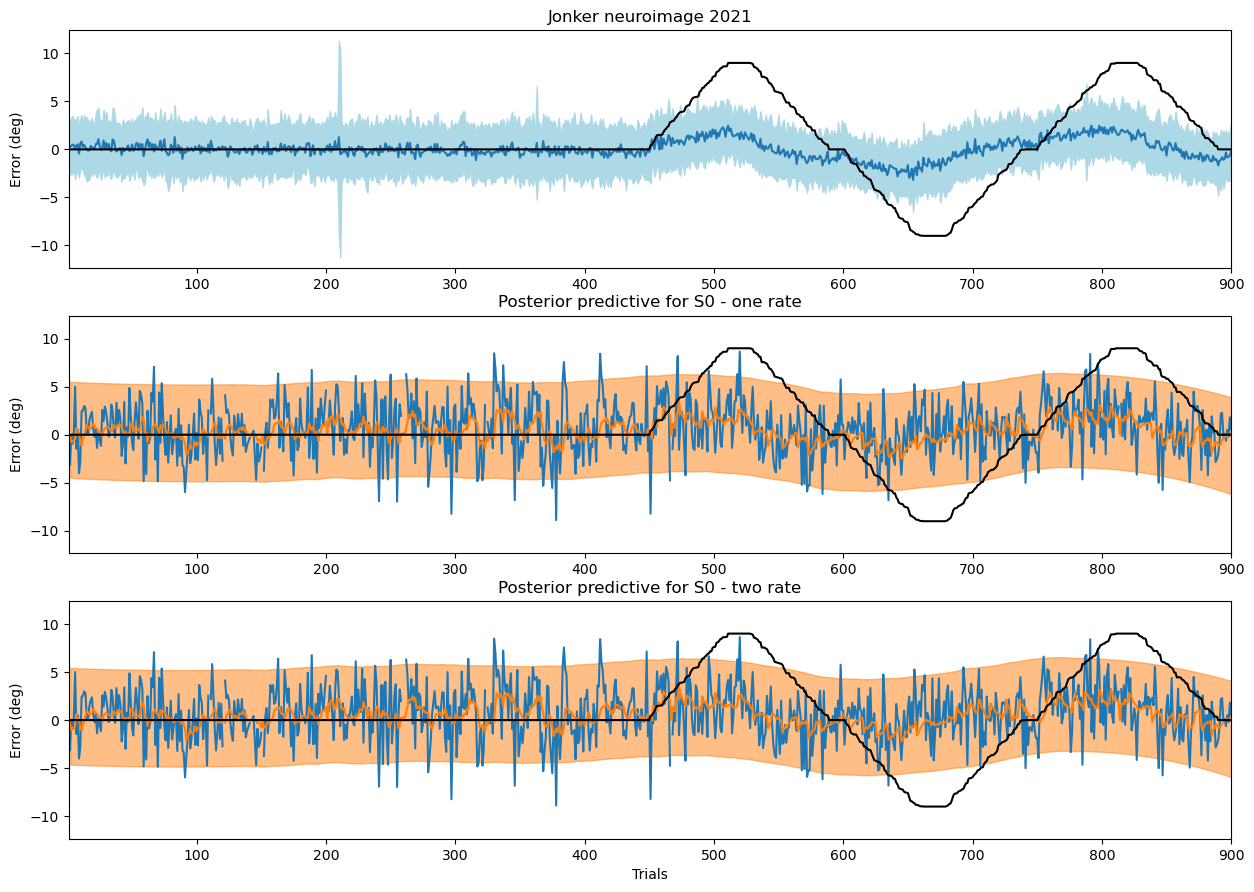

In [191]:
# Plot data from Jonker - Neuroimage - 2021
fig, axs = plt.subplots(3, 1, figsize=(15, 10.5))
axs[0].set_title("Jonker neuroimage 2021")
axs[0].plot(np.arange(900)+1,np.nanmean(jonker_y,axis=0))
axs[0].fill_between(np.arange(900)+1,np.nanmean(jonker_y,axis=0)-np.nanstd(jonker_y,axis=0),np.nanmean(jonker_y,axis=0)+np.nanstd(jonker_y,axis=0),color='lightblue')
axs[0].plot(np.arange(900)+1,np.nanmean(jonker_p,axis=0),color='black')
axs[0].set_xlim(1, 900)
axs[0].set_ylabel('Error (deg)')

axs[1].set_title("Posterior predictive for S0 - one rate")
axs[1].plot(np.arange(900)+1,jonker_y[0,:])
axs[1].plot(jonker_one_rate.posterior_predictive['time'],jonker_one_rate.posterior_predictive.S0_obs.mean(['chain','draw']))
az.plot_hdi(jonker_one_rate.posterior_predictive['time'],np.squeeze(jonker_one_rate.posterior_predictive.S0_obs),ax=axs[1])
axs[1].plot(np.arange(900)+1,np.nanmean(jonker_p,axis=0),color='black')
axs[1].set_ylabel('Error (deg)')
axs[1].sharex(axs[0])
axs[1].sharey(axs[0])

axs[2].set_title("Posterior predictive for S0 - two rate")
axs[2].plot(np.arange(900)+1,jonker_y[0,:])
axs[2].plot(jonker_two_rate.posterior_predictive['time'],jonker_two_rate.posterior_predictive.S0_obs.mean(['chain','draw']))
az.plot_hdi(jonker_two_rate.posterior_predictive['time'],np.squeeze(jonker_two_rate.posterior_predictive.S0_obs),ax=axs[2])
axs[2].plot(np.arange(900)+1,np.nanmean(jonker_p,axis=0),color='black')
axs[2].set_xlabel('Trials')
axs[2].set_ylabel('Error (deg)')
axs[2].sharex(axs[0])
axs[2].sharey(axs[0])

<Axes: title={'center': 'Energy plot - two rate'}>

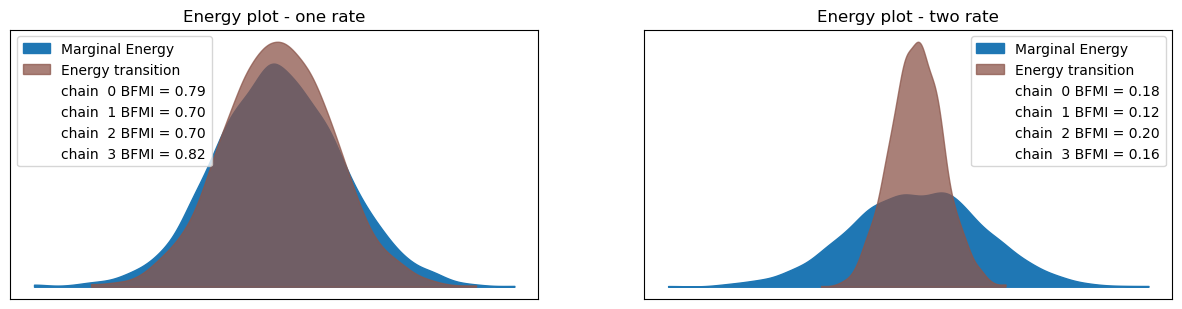

In [149]:
fig, axs = plt.subplots(1, 2, figsize=(15, 3.5))
axs[0].set_title("Energy plot - one rate")
az.plot_energy(jonker_one_rate,ax=axs[0])

axs[1].set_title("Energy plot - two rate")
az.plot_energy(jonker_two_rate,ax=axs[1])

array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'A'}>],
       [<Axes: title={'center': 'B'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'sigma_eta'}>,
        <Axes: title={'center': 'sigma_eta'}>],
       [<Axes: title={'center': 'sigma_epsilon'}>,
        <Axes: title={'center': 'sigma_epsilon'}>]], dtype=object)

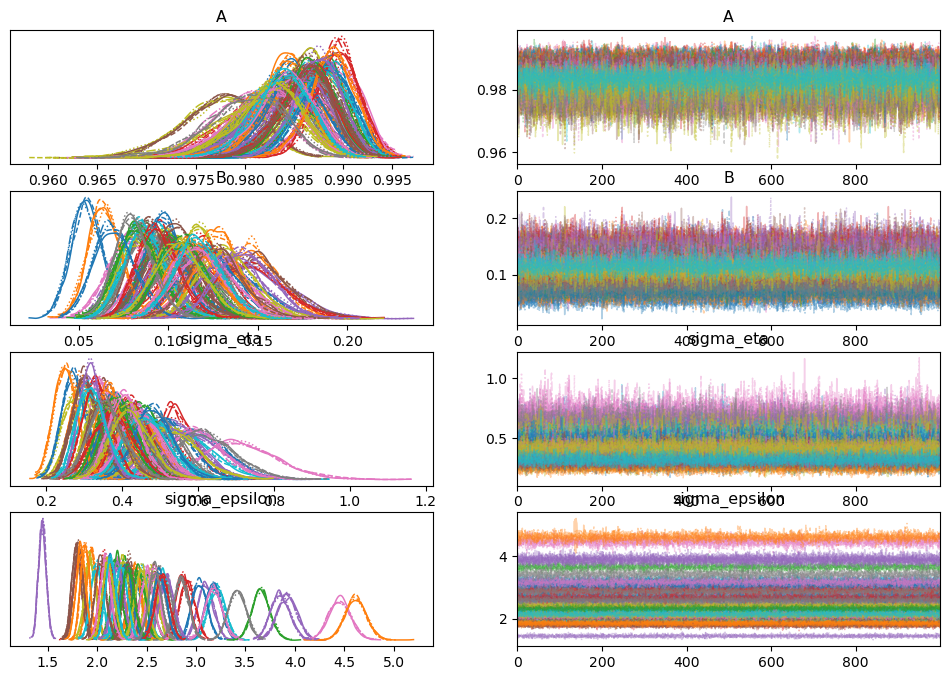

In [193]:
az.plot_trace(jonker_one_rate, var_names=['A','B','sigma_eta','sigma_epsilon'])

array([[<Axes: title={'center': 'A_logit_mu'}>,
        <Axes: title={'center': 'A_logit_sd'}>,
        <Axes: title={'center': 'B_logit_mu'}>,
        <Axes: title={'center': 'B_logit_sd'}>],
       [<Axes: title={'center': 'var_total_mu'}>,
        <Axes: title={'center': 'var_total_sd'}>,
        <Axes: title={'center': 'ratio_logit_mu'}>,
        <Axes: title={'center': 'ratio_logit_sd'}>]], dtype=object)

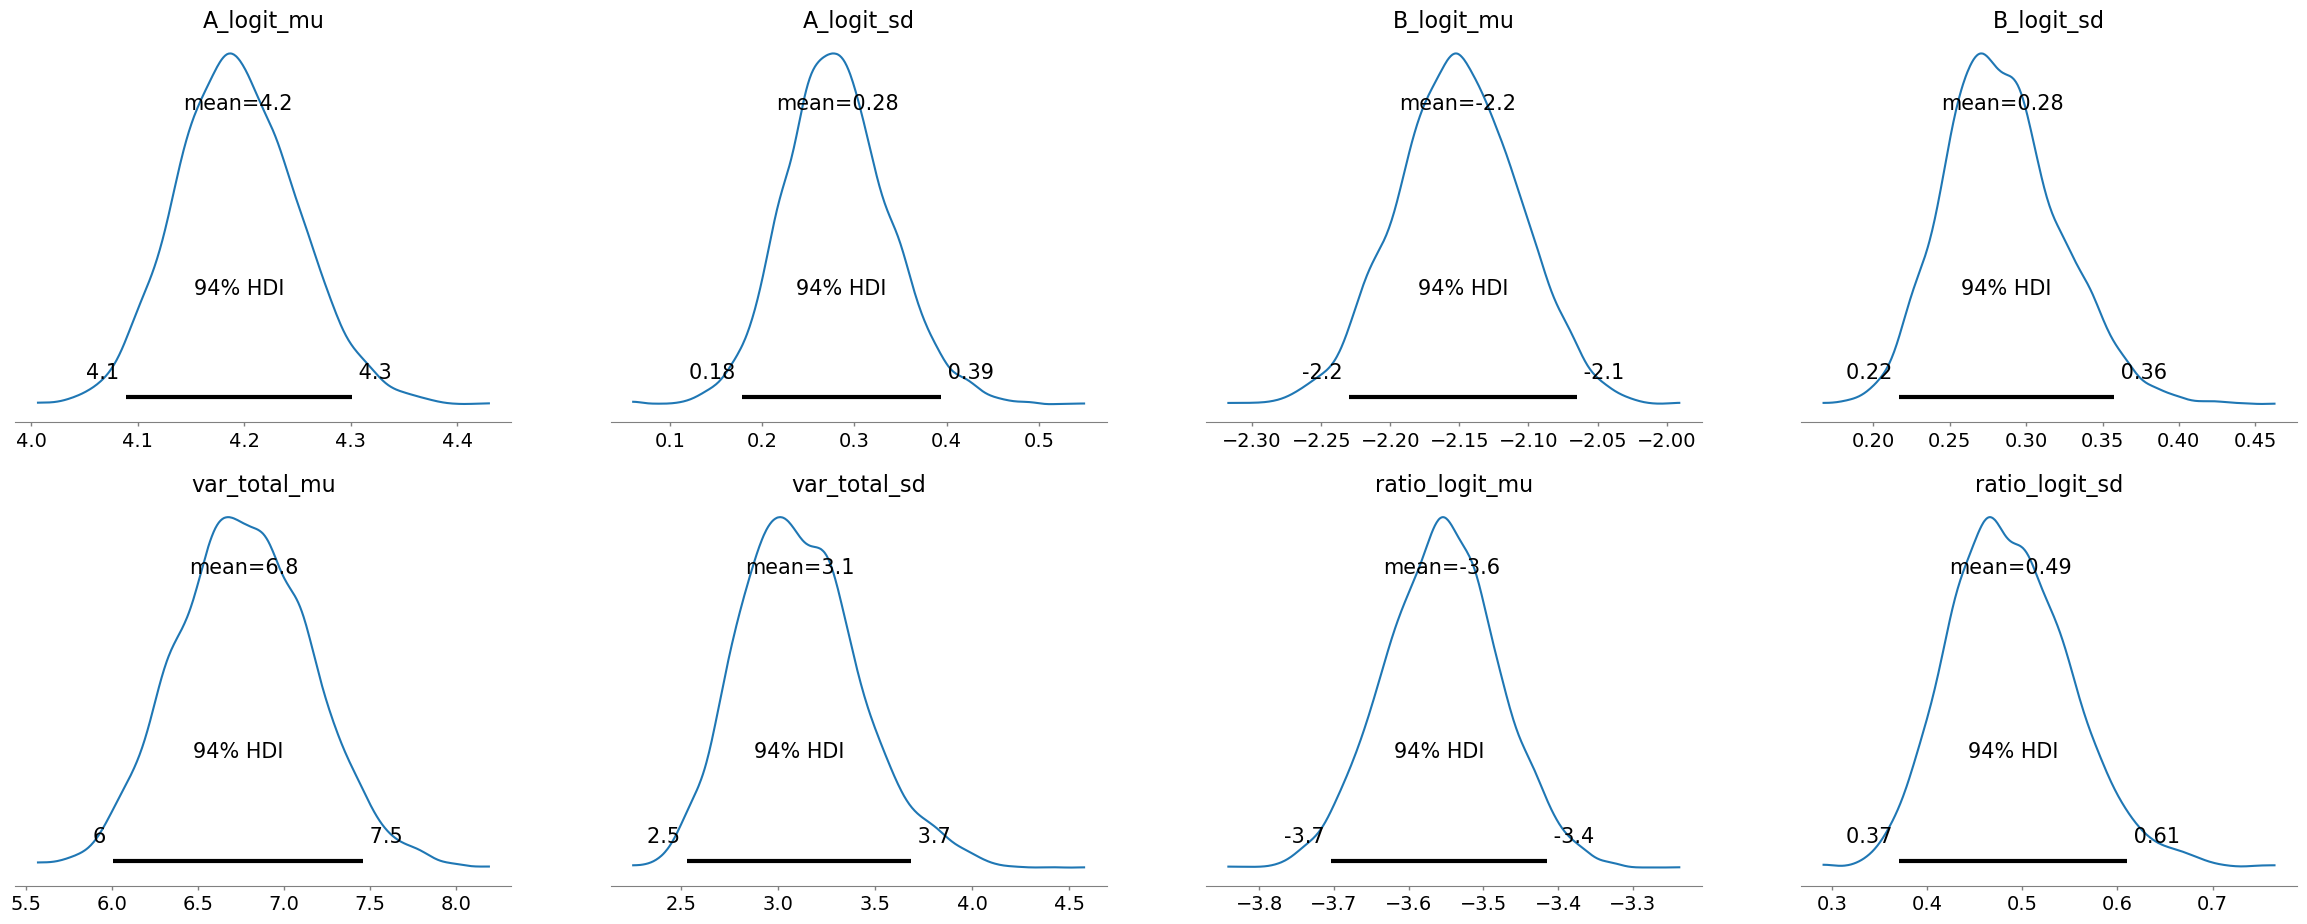

In [201]:
az.plot_posterior(jonker_one_rate, var_names=['A_logit_mu','A_logit_sd','B_logit_mu','B_logit_sd',
                                              'var_total_mu','var_total_sd','ratio_logit_mu','ratio_logit_sd'])

array([[<Axes: title={'center': 'Af'}>, <Axes: title={'center': 'Af'}>],
       [<Axes: title={'center': 'As'}>, <Axes: title={'center': 'As'}>],
       [<Axes: title={'center': 'Bf'}>, <Axes: title={'center': 'Bf'}>],
       [<Axes: title={'center': 'Bs'}>, <Axes: title={'center': 'Bs'}>],
       [<Axes: title={'center': 'sigma_etaf'}>,
        <Axes: title={'center': 'sigma_etaf'}>],
       [<Axes: title={'center': 'sigma_etas'}>,
        <Axes: title={'center': 'sigma_etas'}>],
       [<Axes: title={'center': 'sigma_epsilon'}>,
        <Axes: title={'center': 'sigma_epsilon'}>]], dtype=object)

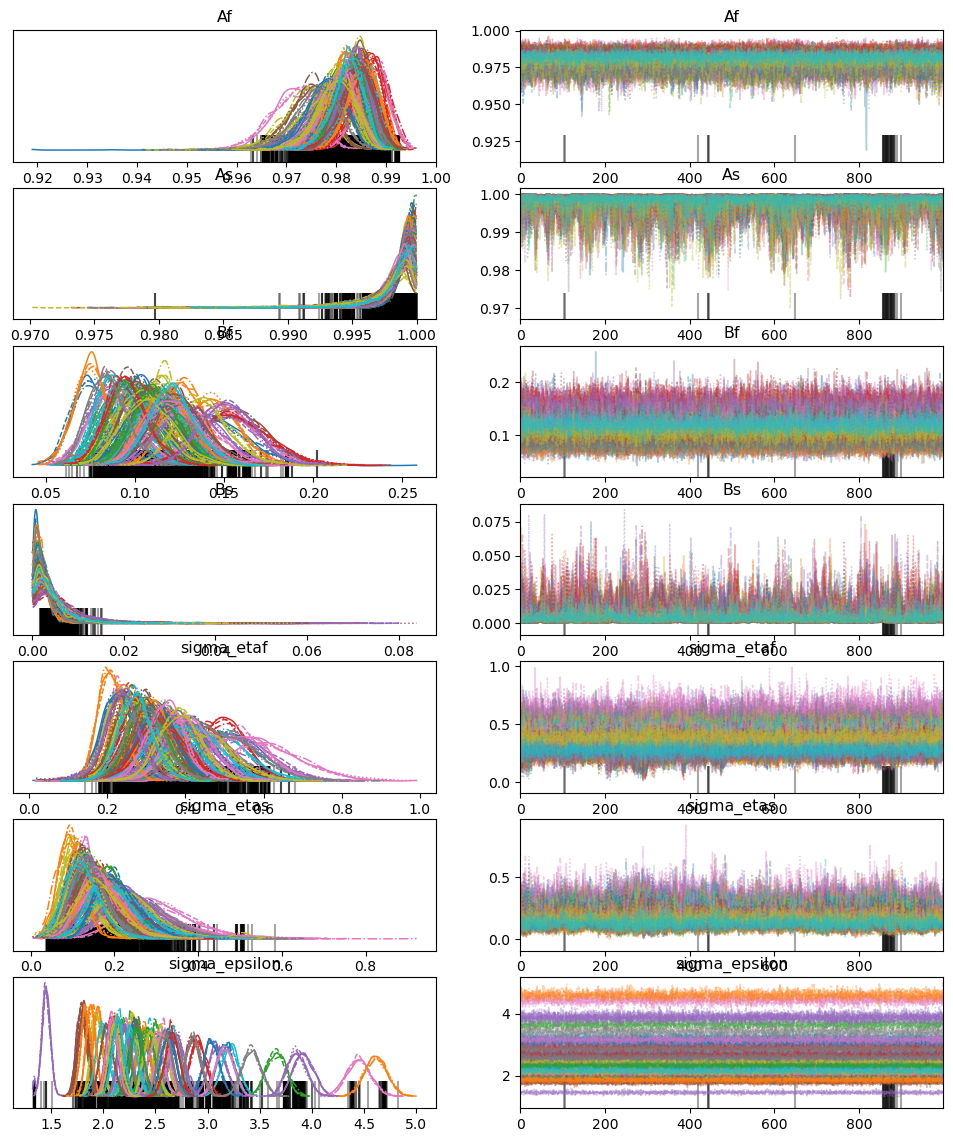

In [ ]:
az.plot_trace(jonker_two_rate, var_names=['imAf_logit_mu','imAf_logit_sd','imAs_logit_mu','imAs_logit_sd',
                                              'Bf_logit_mu','Bf_logit_sd','Bs1_logit_mu','Bs1_logit_sd',
                                              'var_total_mu','var_total_sd','ratio_logit_mu','ratio_logit_sd',
                                              'ratio2_logit_mu','ratio2_logit_sd'])

array([[<Axes: title={'center': 'imAf_logit_mu'}>,
        <Axes: title={'center': 'imAf_logit_sd'}>,
        <Axes: title={'center': 'imAs_logit_mu'}>,
        <Axes: title={'center': 'imAs_logit_sd'}>],
       [<Axes: title={'center': 'Bf_logit_mu'}>,
        <Axes: title={'center': 'Bf_logit_sd'}>,
        <Axes: title={'center': 'Bs1_logit_mu'}>,
        <Axes: title={'center': 'Bs1_logit_sd'}>],
       [<Axes: title={'center': 'var_total_mu'}>,
        <Axes: title={'center': 'var_total_sd'}>,
        <Axes: title={'center': 'ratio_logit_mu'}>,
        <Axes: title={'center': 'ratio_logit_sd'}>],
       [<Axes: title={'center': 'ratio2_logit_mu'}>,
        <Axes: title={'center': 'ratio2_logit_sd'}>, <Axes: >, <Axes: >]],
      dtype=object)

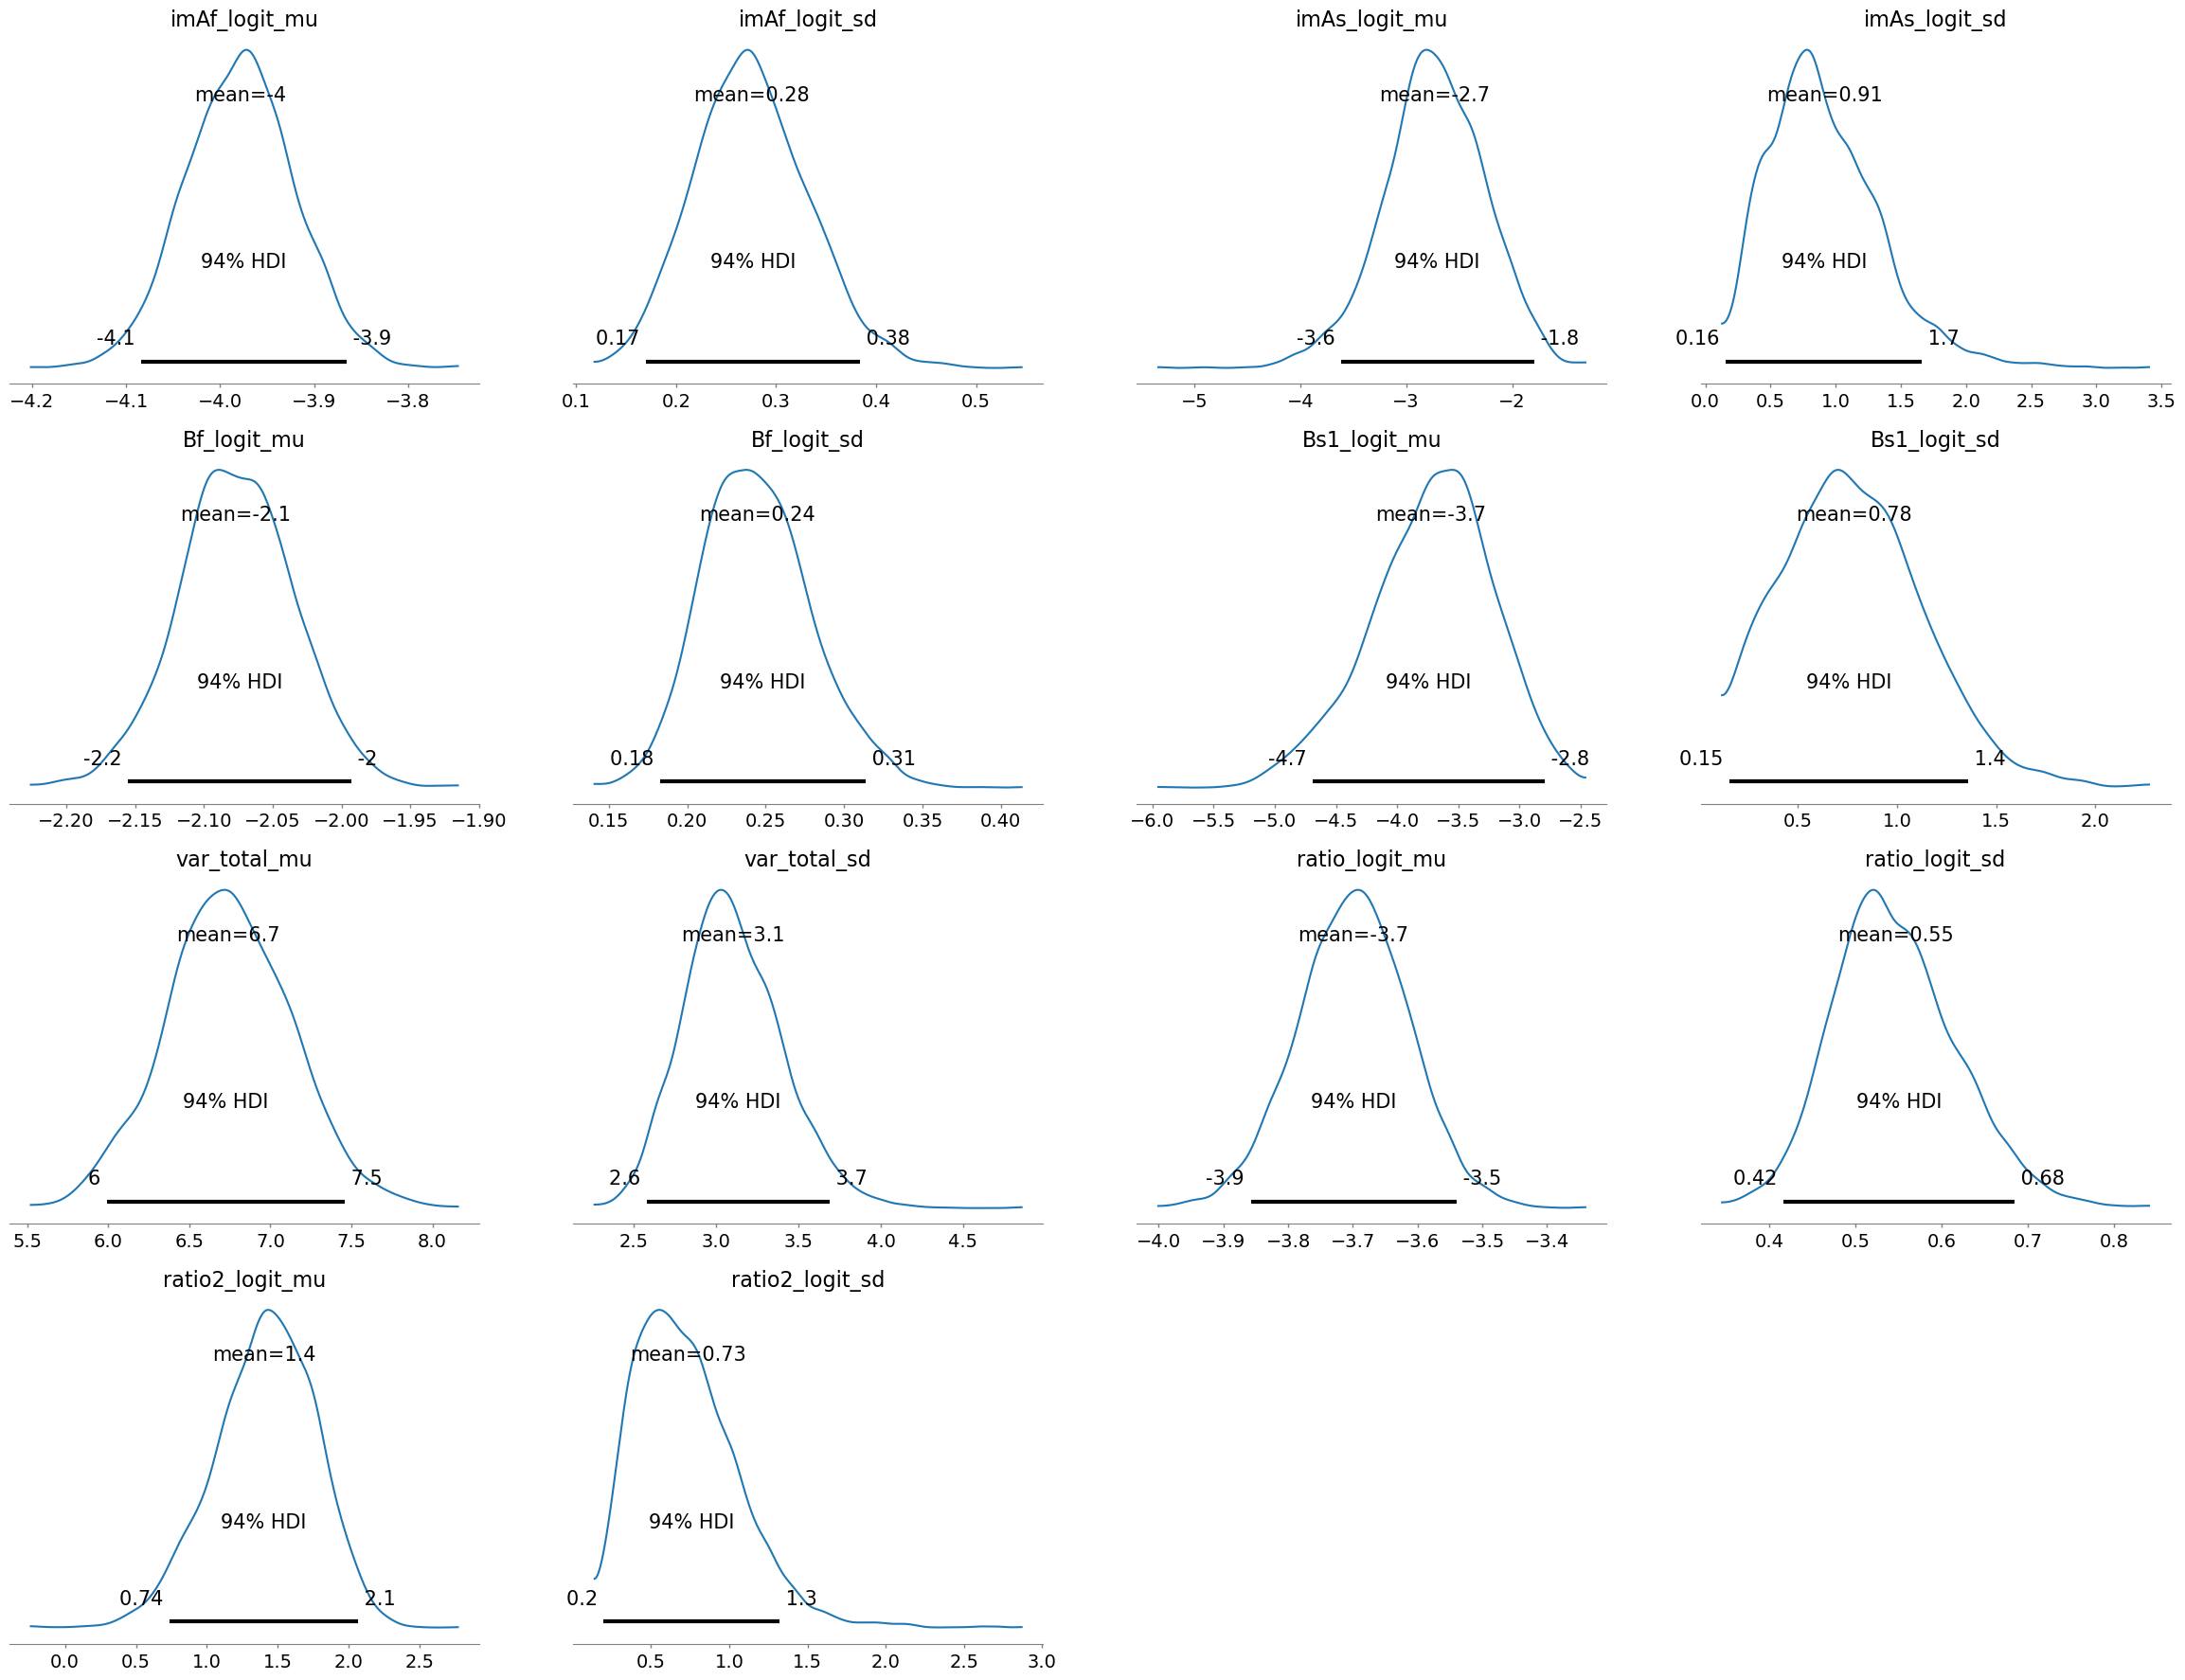

In [217]:
az.plot_posterior(jonker_two_rate, var_names=['imAf_logit_mu','imAf_logit_sd','imAs_logit_mu','imAs_logit_sd',
                                              'Bf_logit_mu','Bf_logit_sd','Bs1_logit_mu','Bs1_logit_sd',
                                              'var_total_mu','var_total_sd','ratio_logit_mu','ratio_logit_sd',
                                              'ratio2_logit_mu','ratio2_logit_sd'])

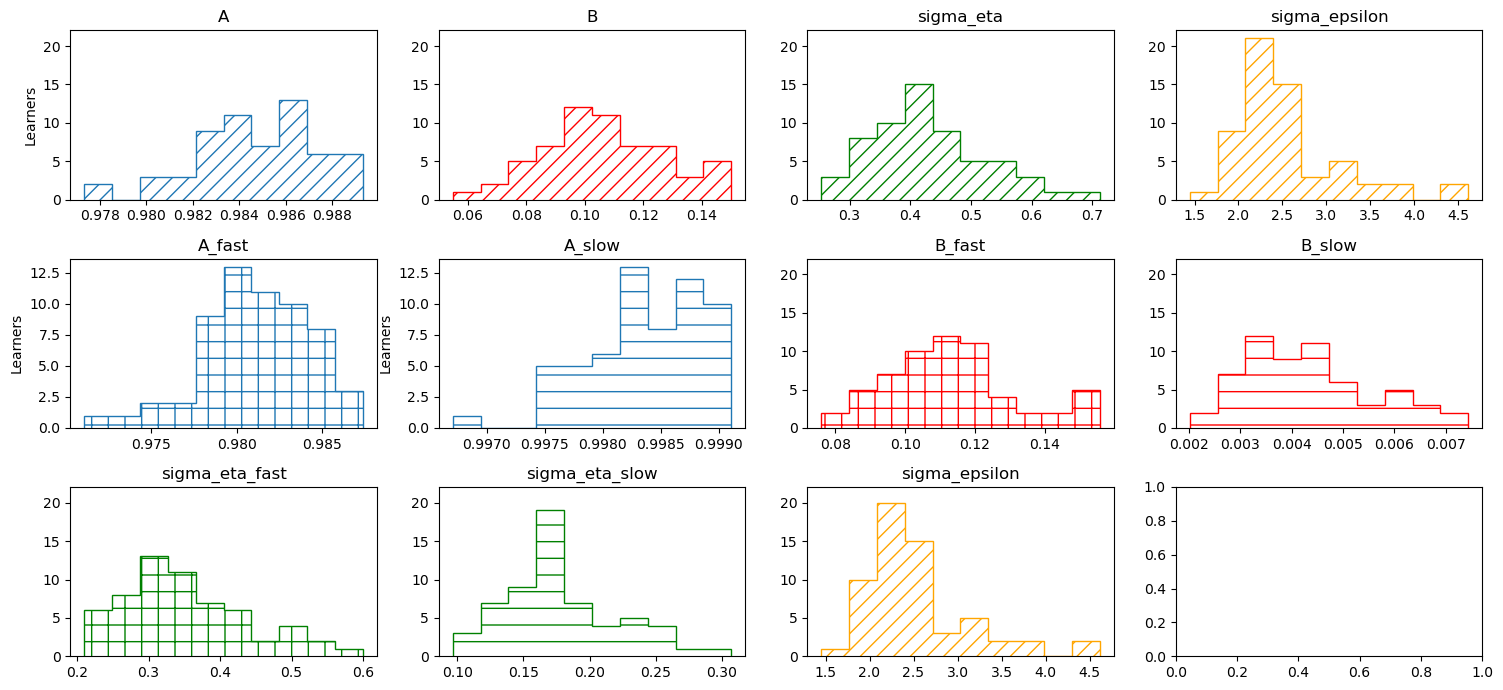

In [134]:
fig, axs = plt.subplots(3, 4, figsize=(15, 7))
axs[0,0].set_title("A")
counts, bins = np.histogram(est_params_jor['A_est'])
axs[0,0].stairs(counts, bins,hatch='//')
axs[0,0].set_ylabel('Learners')

axs[0,1].set_title("B")
counts, bins = np.histogram(est_params_jor['B_est'])
axs[0,1].stairs(counts, bins,hatch='//',color='red')
axs[0,1].sharey(axs[0, 0])

axs[0,2].set_title("sigma_eta")
counts, bins = np.histogram(est_params_jor['sigma_eta_est'])
axs[0,2].stairs(counts, bins,hatch='//',color='green')
axs[0,2].sharey(axs[0, 0])

axs[0,3].set_title("sigma_epsilon")
counts, bins = np.histogram(est_params_jor['sigma_epsilon_est'])
axs[0,3].stairs(counts, bins,hatch='//',color='orange')
axs[0,3].sharey(axs[0, 0])

axs[1,0].set_title("A_fast")
counts, bins = np.histogram(est_params_jtr['Af_est'])
axs[1,0].stairs(counts, bins,hatch='+')
axs[1,0].set_ylabel('Learners')

axs[1,1].set_title("A_slow")
counts, bins = np.histogram(est_params_jtr['As_est'])
axs[1,1].stairs(counts, bins,hatch='-')
axs[1,1].set_ylabel('Learners')

axs[1,2].set_title("B_fast")
counts, bins = np.histogram(est_params_jtr['Bf_est'])
axs[1,2].stairs(counts, bins,hatch='+',color='red')
axs[1,2].sharey(axs[0, 0])

axs[1,3].set_title("B_slow")
counts, bins = np.histogram(est_params_jtr['Bs_est'])
axs[1,3].stairs(counts, bins,hatch='-',color='red')
axs[1,3].sharey(axs[0, 0])

axs[2,0].set_title("sigma_eta_fast")
counts, bins = np.histogram(est_params_jtr['sigma_etaf_est'])
axs[2,0].stairs(counts, bins,hatch='+',color='green')
axs[2,0].sharey(axs[0, 0])

axs[2,1].set_title("sigma_eta_slow")
counts, bins = np.histogram(est_params_jtr['sigma_etas_est'])
axs[2,1].stairs(counts, bins,hatch='-',color='green')
axs[2,1].sharey(axs[0, 0])

axs[2,2].set_title("sigma_epsilon")
counts, bins = np.histogram(est_params_jtr['sigma_epsilon_est'])
axs[2,2].stairs(counts, bins,hatch='//',color='orange')
axs[2,2].sharey(axs[0, 0])

fig.tight_layout()

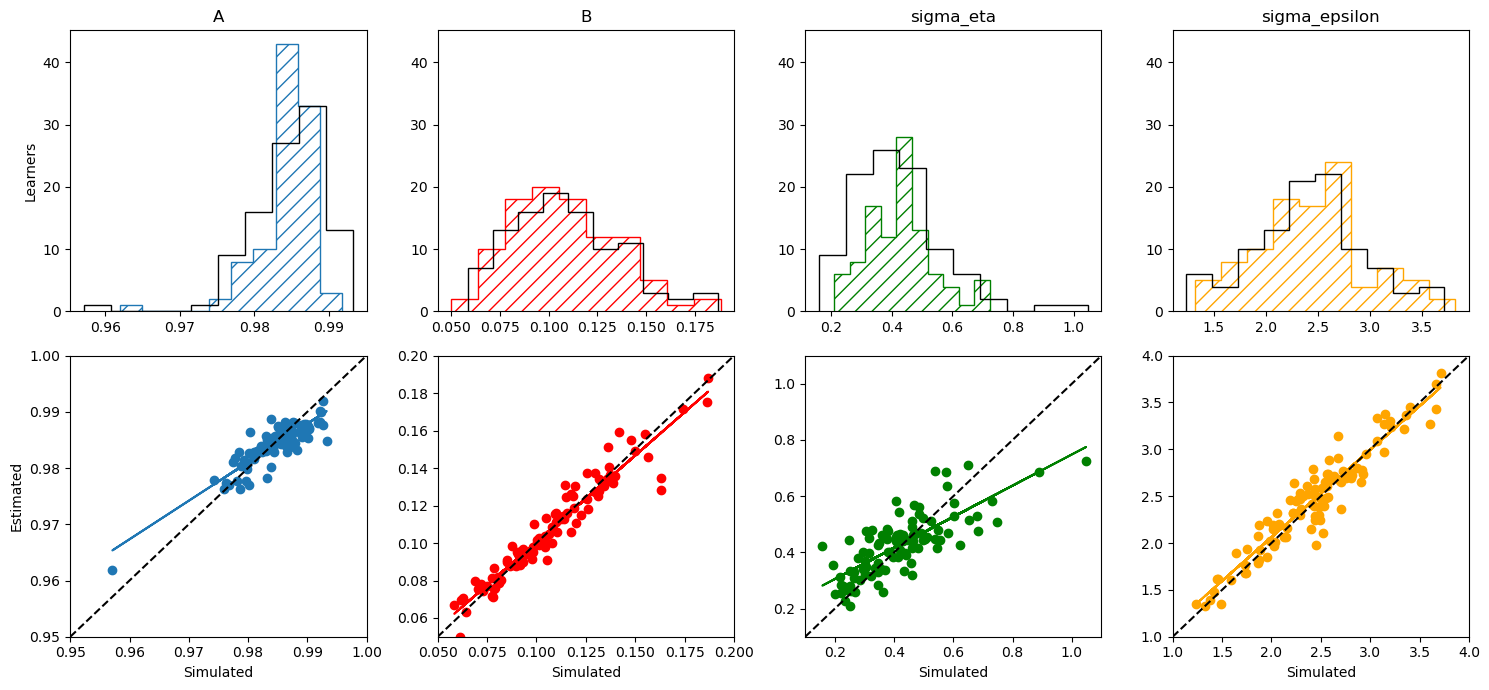

In [258]:
# One rate - non-hierarchical
correlate_params(gen_params_one_rate, est_params_dormornh, two_rate=False)

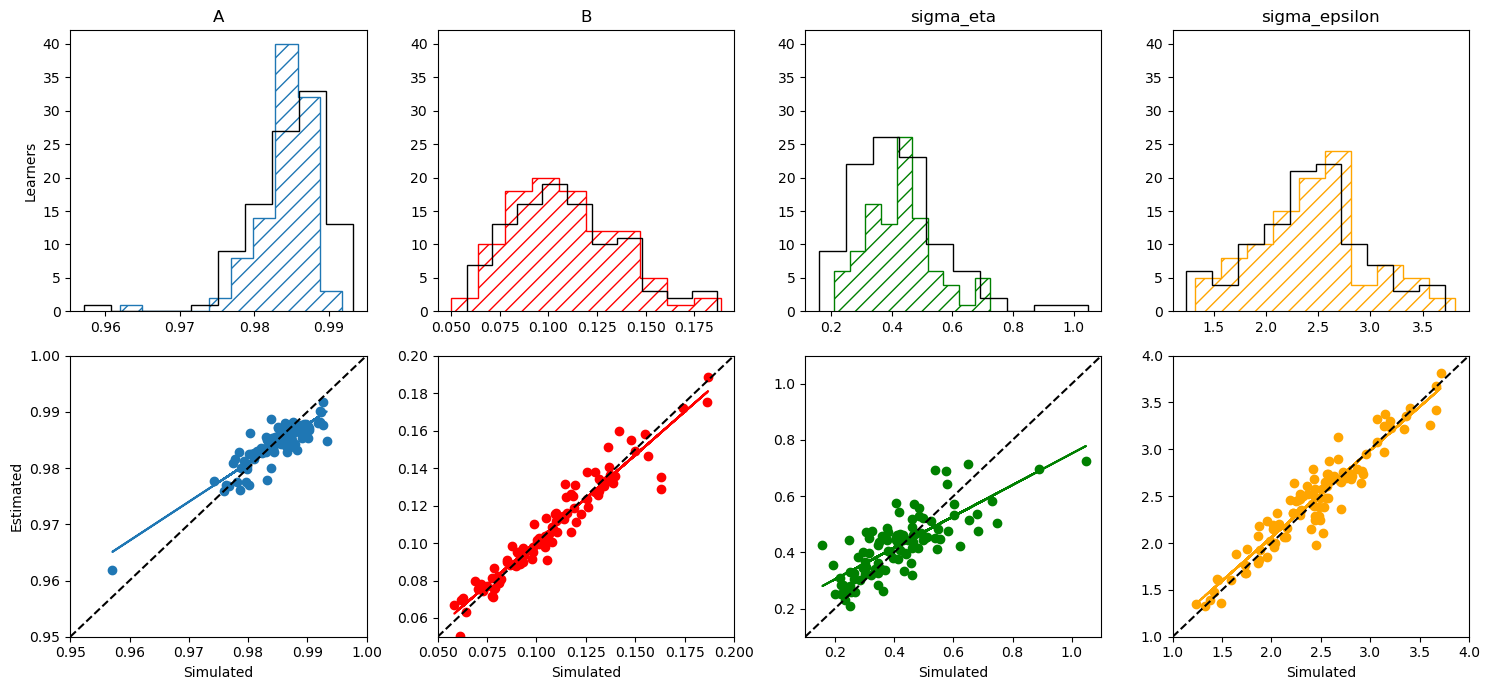

In [260]:
# One rate - hierarchical
correlate_params(gen_params_one_rate, est_params_dormorh, two_rate=False)

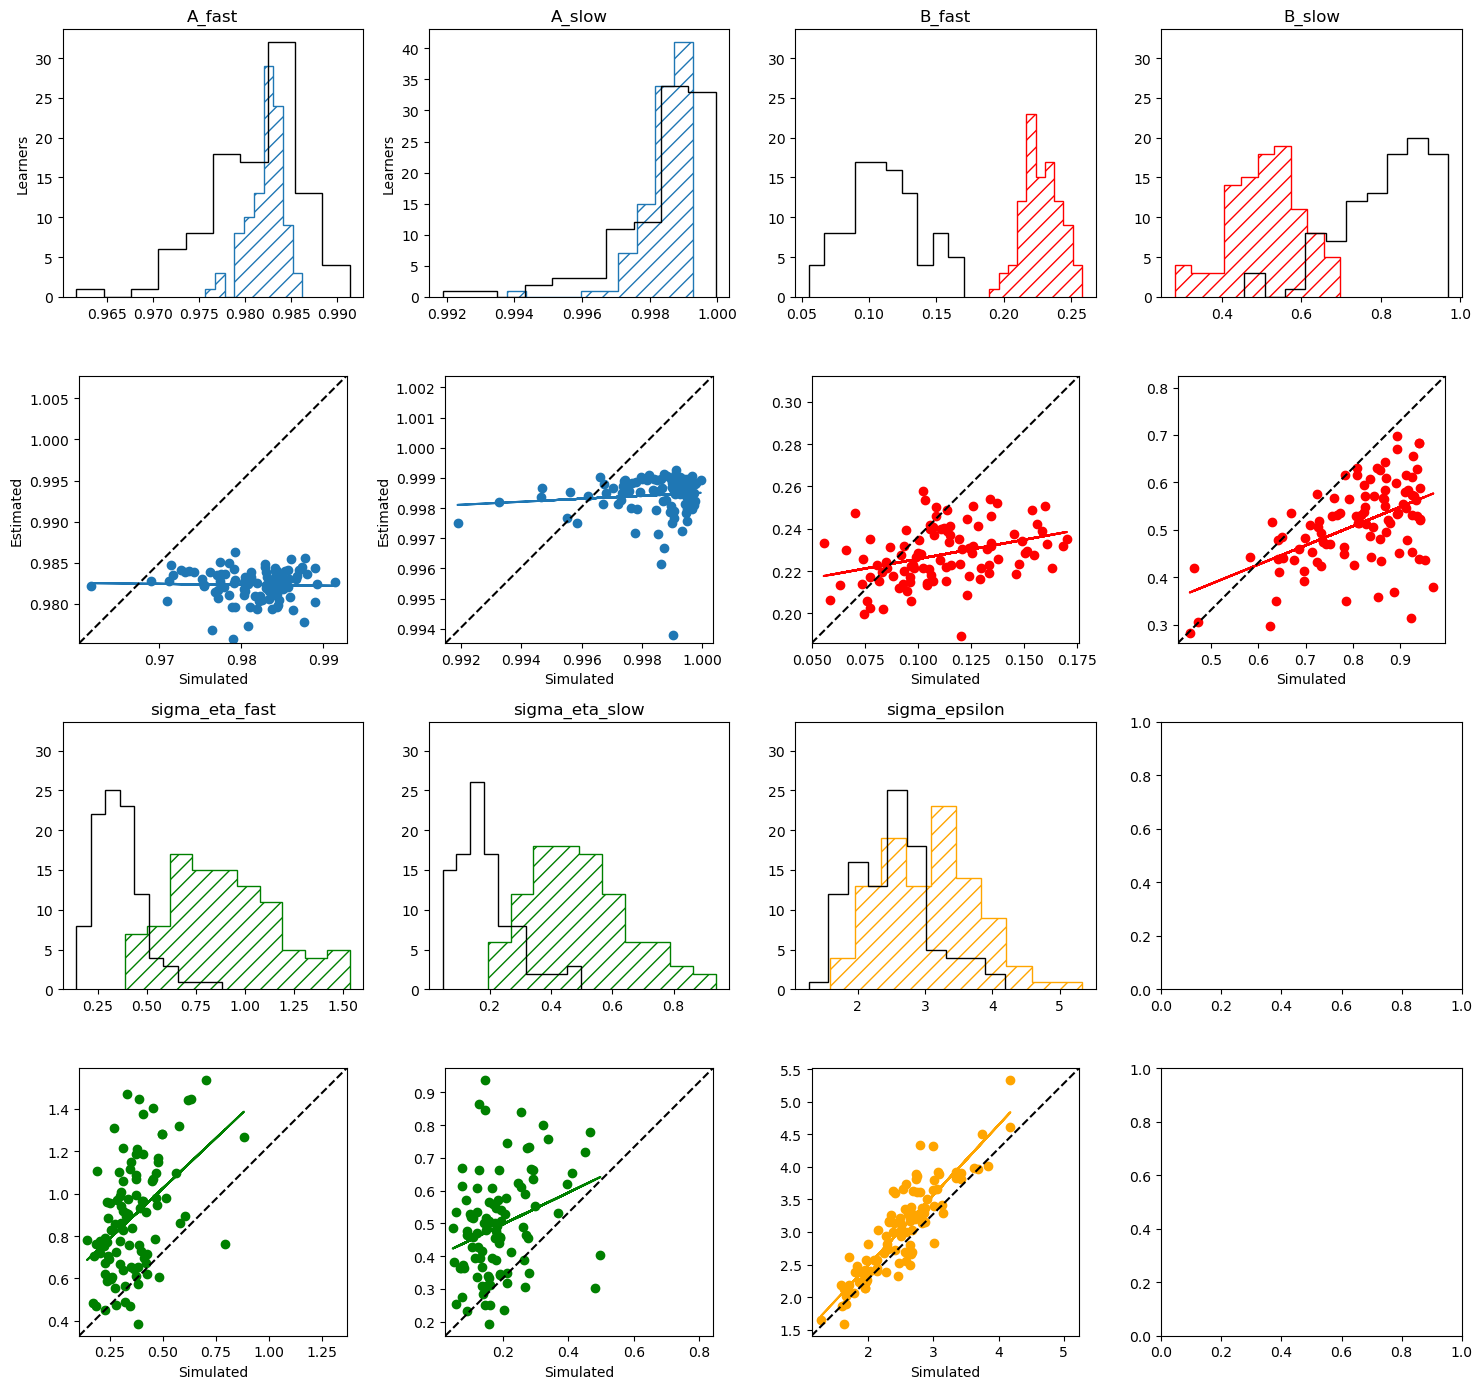

In [248]:
# Two rate - non-hierarchical
correlate_params(gen_params_two_rate, est_params_dtrmtrnh, two_rate=True)

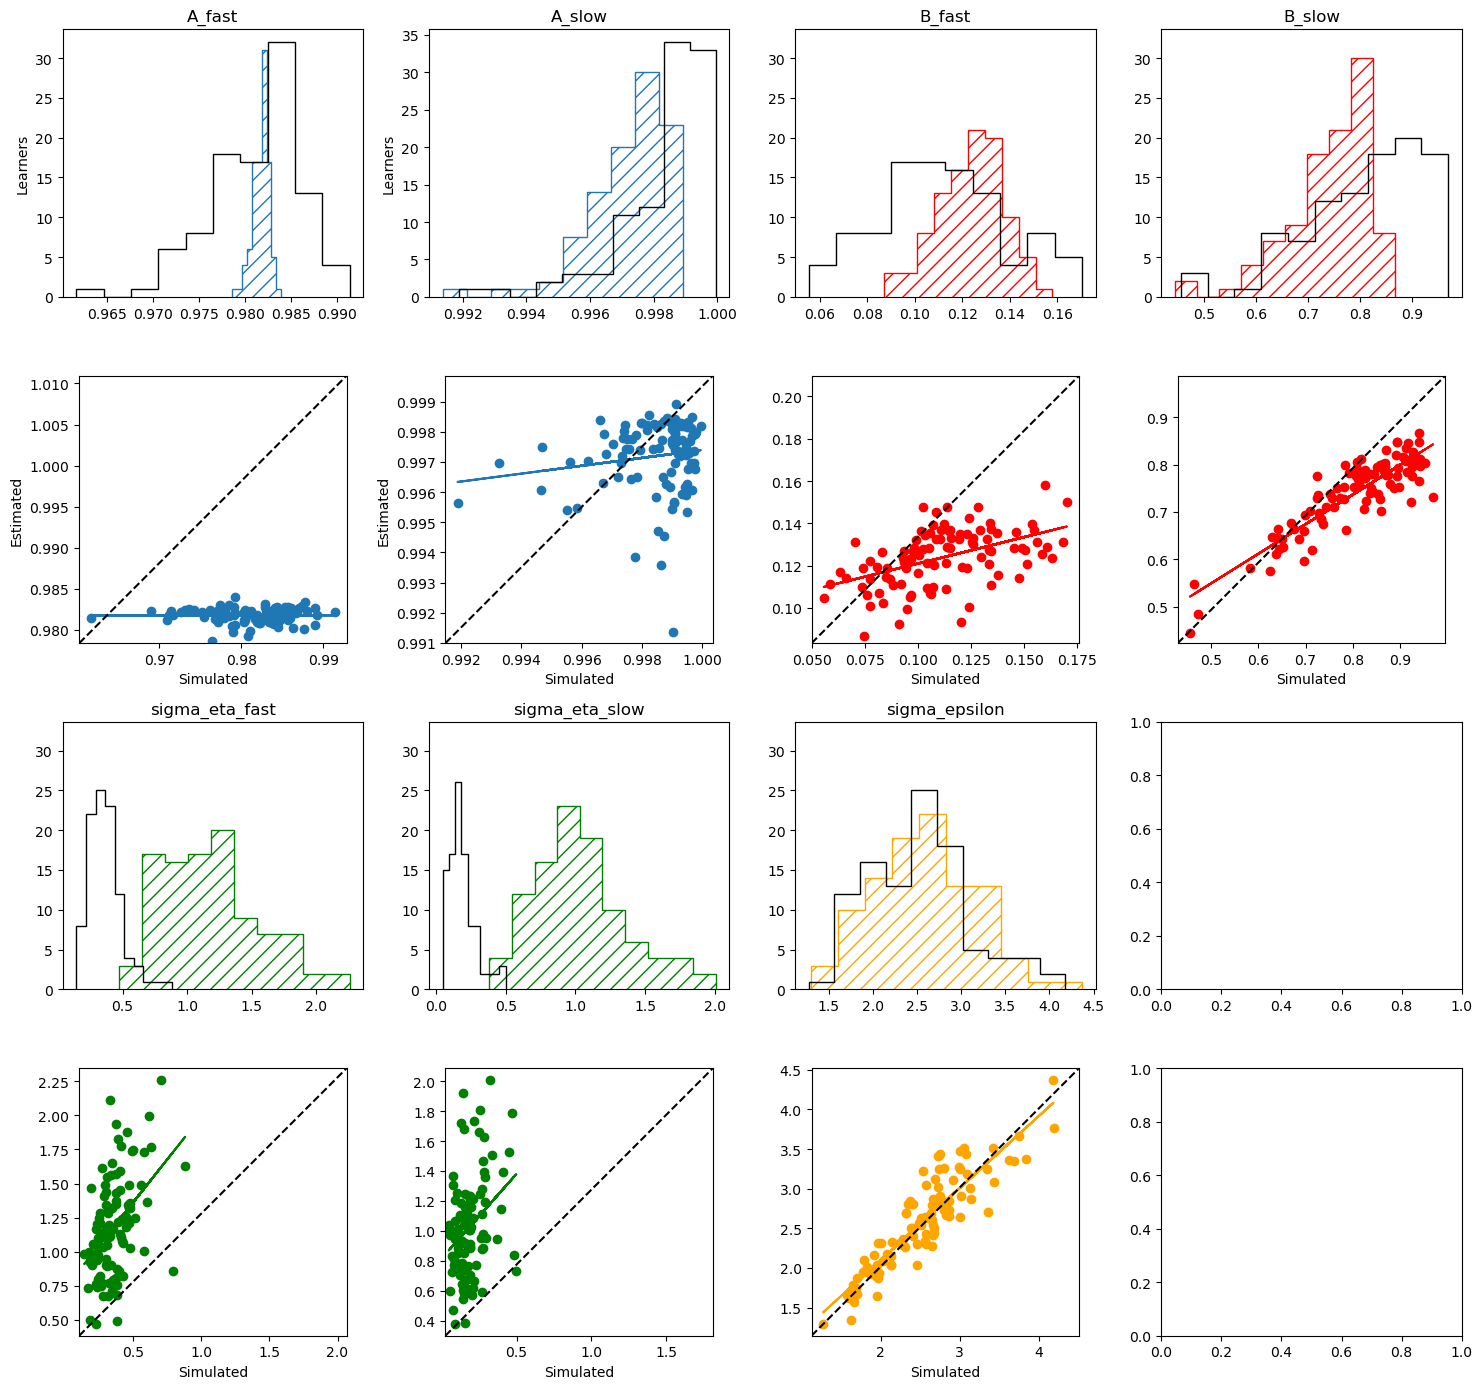

In [249]:
# Two rate - hierarchical
correlate_params(gen_params_two_rate, est_params_dtrmtrh, two_rate=True)